In [58]:
# ----- LIBS

# geoprocessamento
import geopandas as gpd
from shapely.geometry import Polygon
from shapely.geometry import Point
from shapely.geometry import box

# normalizar
import numpy as np
from shapely.geometry import mapping
from sklearn.preprocessing import MinMaxScaler

# plots
import matplotlib.pyplot as plt

# gerar e visualizar csv
import csv
import pandas as pd

# Extração de shapes e Plots da Unicamp

- Extração de região geográfica de interesse (bbbike) no formato .shp
- Plot de shapes

In [3]:
# Apontando para o path do dataset do Mapa de Edificações 
# - https://unicamp-arcgis.maps.arcgis.com/apps/View/index.html?appid=1d96ada62af4451bb4972b9779d09e66

import os

current_path = os.getcwd()
print(current_path)
# print(current_path.find('obstacle_exp'))
print(current_path[0:current_path.find('obstacle_exp')])

map_dataset_path = current_path[0:current_path.find('obstacle_exp')]
building_shp_path = "datasets/unicamp-arcgis-dataset/edificacoes.shp"

unicamp_building_dataset_path = map_dataset_path + building_shp_path

/home/wasp/Desktop/Mestrado/ns3-bmap/NS3/obstacle_exp/unicamp-arcgis-input-to-ns3
/home/wasp/Desktop/Mestrado/ns3-bmap/NS3/


In [15]:
# ----- READ BUILDING SHAPES DATASET

unicamp_df = gpd.read_file(unicamp_building_dataset_path)
# unicamp_roads_df = gpd.read_file(unicamp_roads_dataset_path)

print('SHAPE:', unicamp_df.shape)
unicamp_df.head(5)

SHAPE: (1170, 8)


,Id,PREDIO,NOME_DO_PR,UNIDADE,GlobalID,Shape_Leng,Shape_Area,geometry
0,444.0,8.0,CASA NO BREAK,"INSTITUTO DE FÍSICA""GLEB WATAGHIN"" (IFGW)",{A3AA0550-2317-433F-888F-BBA6148200AF},49.024480,135.943591,"POLYGON Z ((287762.773 7475309.137 0.000, 2877..."
1,65.0,11.0,DEPÓSITO DE MATERIAIS - DEM,HOSPITAL DE CLÍNICAS (HC),{418DC5B5-3050-40D4-BC58-E4BDFA11D4F3},56.199993,190.900186,"POLYGON Z ((288123.323 7474311.958 0.000, 2881..."
2,1282.0,4.0,SALAS DE AULA,"FAC.ENGa.CIVIL,ARQ. E URBANISMO",{D8A7EC89-2748-4E88-A3EB-6F9F1936A78E},176.558770,789.413458,"POLYGON Z ((288387.086 7475327.825 0.000, 2883..."
3,1213.0,3.0,"ENSINO NÃO FORMAL I -SALAS DE AULA, SANITÁRIOS...",REITORIA-DGRH-PRODECAD(PROGRAMA DE INTEGRAÇÃO ...,{3D213FFB-8861-4FCA-87C9-A345CC05A47F},146.166513,742.639919,"POLYGON Z ((288411.495 7474069.585 0.000, 2884..."
4,1212.0,2.0,CRECHE-ÁREA DE SAÚDE,REITORIA-DGRH,{D8264B17-8B9E-4391-BDF7-77A0C6E2A0F5},277.043596,1226.905874,"POLYGON Z ((288406.430 7474092.163 0.000, 2883..."


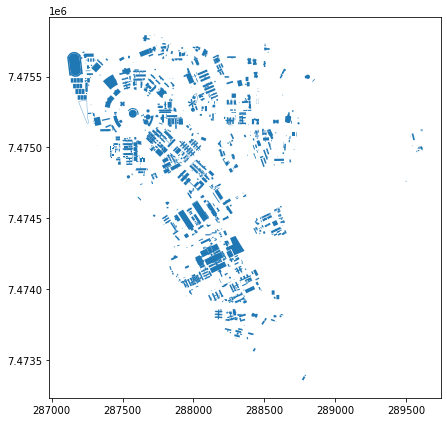

In [12]:
# ----- Plot UNICAMP MAPA Edificações
ax = unicamp_df.plot(figsize=(15, 7))

In [21]:
# Add coluna com centroids

unicamp_df['centroids'] = unicamp_df.centroid
# unicamp_df['centroids']
unicamp_df.head(3)

,Id,PREDIO,NOME_DO_PR,UNIDADE,GlobalID,Shape_Leng,Shape_Area,geometry,centroids
0,444.0,8.0,CASA NO BREAK,"INSTITUTO DE FÍSICA""GLEB WATAGHIN"" (IFGW)",{A3AA0550-2317-433F-888F-BBA6148200AF},49.024480,135.943591,"POLYGON Z ((287762.773 7475309.137 0.000, 2877...",POINT (287754.847 7475304.757)
1,65.0,11.0,DEPÓSITO DE MATERIAIS - DEM,HOSPITAL DE CLÍNICAS (HC),{418DC5B5-3050-40D4-BC58-E4BDFA11D4F3},56.199993,190.900186,"POLYGON Z ((288123.323 7474311.958 0.000, 2881...",POINT (288127.015 7474321.129)
2,1282.0,4.0,SALAS DE AULA,"FAC.ENGa.CIVIL,ARQ. E URBANISMO",{D8A7EC89-2748-4E88-A3EB-6F9F1936A78E},176.558770,789.413458,"POLYGON Z ((288387.086 7475327.825 0.000, 2883...",POINT (288365.495 7475324.101)


# Normalização de Mapa da Unicamp

In [22]:
# Bounds of Unicamp Map
unicamp_minx, unicamp_miny, unicamp_maxx, unicamp_maxy = unicamp_df.geometry.total_bounds

print('bounds:', unicamp_minx, unicamp_miny, unicamp_maxx, unicamp_maxy)
print('x:', unicamp_maxx-unicamp_minx)
print('y:', unicamp_maxy- unicamp_miny)


bounds: 287109.0126 7473356.5109 289617.4537000004 7475795.9585
x: 2508.441100000404
y: 2439.4475999996066


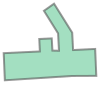

In [25]:
# get all geometries of unicamp_utm_df
unicamp_geometries = [i for i in unicamp_df.geometry]

# geometry example
unicamp_geometries[2]

In [29]:
map_minx = 1e+10
map_maxx = -1
map_miny = 1e+10
map_maxy = -1

for geometry in range(len(unicamp_geometries)):
    
    # get all coordinates (x,y) of polygons in unicamp_utm_df
    all_coords_per_geometry = mapping(unicamp_geometries[geometry])["coordinates"] 

    # split all coordinates per geometry and get x coords and y coords
    x_coords = [all_coords_per_geometry[0][i][0] for i in range(len(all_coords_per_geometry[0]))]
    y_coords = [all_coords_per_geometry[0][i][1] for i in range(len(all_coords_per_geometry[0]))]
    
    # convert to 2D array
    x_coords = np.array(x_coords)
    y_coords = np.array(y_coords)
    
    # get all geometry coords in x and y
    if geometry == 0:
        all_coords_x = x_coords.copy()
        all_coords_y = y_coords.copy()
    else:
        all_coords_x = np.append (all_coords_x, x_coords.copy(), axis=0)
        all_coords_y = np.append (all_coords_y, y_coords.copy(), axis=0)
        
    # get bounds limits of map and compare with unicamp_utm_df.geometry.total_bounds
    # after for loop, limits must be equal
    if np.min(x_coords) < map_minx:
        map_minx = np.min(x_coords)
    if np.max(x_coords) > map_maxx:
        map_maxx = np.max(x_coords)
    
    if np.min(y_coords) < map_miny:
        map_miny = np.min(y_coords)
    if np.max(y_coords) > map_maxy:
        map_maxy = np.max(y_coords)
    

# after for loop, limits must be equal
print(map_minx, map_miny,map_maxx, map_maxy)
print(unicamp_minx, unicamp_miny, unicamp_maxx, unicamp_maxy)
# yey

# convert to 2D array 
x = np.array(all_coords_x).reshape(-1, 1) # reshape -> 2D array
y = np.array(all_coords_y).reshape(-1, 1)

287109.0126 7473356.5109 289617.4537000004 7475795.9585
287109.0126 7473356.5109 289617.4537000004 7475795.9585


In [32]:
# create a normalized map with unicamp bounds

# criando novo mapa, que conterá geometrias normalizadas
mapa_normalizado = gpd.GeoDataFrame(columns=["id", "building_name","unit", "geometry"])
mapa_normalizado['id'] = unicamp_df['Id']
mapa_normalizado['building_name'] = unicamp_df['NOME_DO_PR']
mapa_normalizado['unit'] = unicamp_df['UNIDADE']

# processo de normalização
for geometry in range(len(unicamp_geometries)):

    # get all coordinates (x,y) of polygons in unicamp_utm_df
    all_coords_per_geometry = mapping(unicamp_geometries[geometry])["coordinates"] 
    
    # split all coordinates per geometry and get x coords and y coords
    x_coords = [all_coords_per_geometry[0][i][0] for i in range(len(all_coords_per_geometry[0]))]
    y_coords = [all_coords_per_geometry[0][i][1] for i in range(len(all_coords_per_geometry[0]))]
    
    # convert to 2D array
    x_coords = np.array(x_coords).reshape(-1, 1) 
    y_coords = np.array(y_coords).reshape(-1, 1)
    
    # define limits of normalization
    scaler_x = MinMaxScaler(feature_range = (0, unicamp_maxx - unicamp_minx))
    scaler_y = MinMaxScaler(feature_range = (0, unicamp_maxy - unicamp_miny))
    
    # normalize with all all geometry coords x 
    scaler_x.fit(x)
    transform_x = scaler_x.transform(x_coords)
    
    # normalize with all all geometry coords y
    scaler_y.fit(y)
    transform_y = scaler_y.transform(y_coords)
    
    # convert np array x and y normalized back to polygon
    building_geometry = np.append (transform_x, transform_y, axis=1)
    new_polygon = Polygon(building_geometry)
    
    mapa_normalizado.loc[geometry, 'geometry'] = new_polygon
    

print('Shape do Mapa normalizado:', mapa_normalizado.shape)
mapa_normalizado.head()

Shape do Mapa normalizado: (1170, 4)


,id,building_name,unit,geometry
0,444.0,CASA NO BREAK,"INSTITUTO DE FÍSICA""GLEB WATAGHIN"" (IFGW)","POLYGON ((653.760 1952.626, 653.921 1944.120, ..."
1,65.0,DEPÓSITO DE MATERIAIS - DEM,HOSPITAL DE CLÍNICAS (HC),"POLYGON ((1014.311 955.448, 1010.857 962.105, ..."
2,1282.0,SALAS DE AULA,"FAC.ENGa.CIVIL,ARQ. E URBANISMO","POLYGON ((1278.073 1971.314, 1278.638 1957.955..."
3,1213.0,"ENSINO NÃO FORMAL I -SALAS DE AULA, SANITÁRIOS...",REITORIA-DGRH-PRODECAD(PROGRAMA DE INTEGRAÇÃO ...,"POLYGON ((1302.482 713.074, 1302.655 712.709, ..."
4,1212.0,CRECHE-ÁREA DE SAÚDE,REITORIA-DGRH,"POLYGON ((1297.418 735.652, 1280.380 727.660, ..."


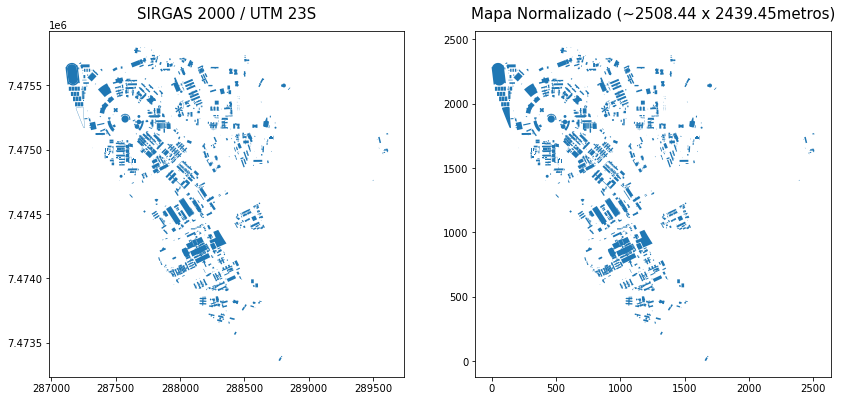

In [45]:
# ANTES E DEPOIS DA NORMALIZAÇÃO

fig, axes = plt.subplots(1,2, figsize = (14, 7)) # 1 linha, 2 colunas

# Mapa da unicamp no crs SIRGAS 2000/ UTM 23S
axes[0].set_title('SIRGAS 2000 / UTM 23S', fontsize=15, y=1.02)
unicamp_df.plot(ax=axes[0])

# Mapa da Unicamp
# onde:
# - unicamp bounds = 285960.71918678837 7473387.272237044 290348.567447891 7476048.738107968
# - maxx - minx    = 4387.848261102627
# - maxy - miny    = 2661.465870924294
title = 'Mapa Normalizado (~' + str(round(unicamp_maxx-unicamp_minx,2)) + ' x ' + str(round(unicamp_maxy-unicamp_miny,2)) + "metros)" 
axes[1].set_title(title,fontsize=15, y=1.02)
mapa_normalizado.plot(ax=axes[1])

plt.show()

In [47]:
mapa_normalizado.head(3)

,id,building_name,unit,geometry
0,444.0,CASA NO BREAK,"INSTITUTO DE FÍSICA""GLEB WATAGHIN"" (IFGW)","POLYGON ((653.760 1952.626, 653.921 1944.120, ..."
1,65.0,DEPÓSITO DE MATERIAIS - DEM,HOSPITAL DE CLÍNICAS (HC),"POLYGON ((1014.311 955.448, 1010.857 962.105, ..."
2,1282.0,SALAS DE AULA,"FAC.ENGa.CIVIL,ARQ. E URBANISMO","POLYGON ((1278.073 1971.314, 1278.638 1957.955..."


In [24]:
# Some useful functions

from shapely.geometry import Point
from shapely.geometry import box


ref_osm_id = int(10000000)
def add_dataset_rows(geodataset, new_polygon, name, type_building ):
    global ref_osm_id
    last_index = geodataset.shape[0]
    geodataset.loc[last_index, 'geometry'] = new_polygon
    geodataset.loc[last_index, 'osm_id'] = ref_osm_id
    geodataset.loc[last_index, 'name'] = name
    geodataset.loc[last_index, 'type'] = type_building
    ref_osm_id = int(ref_osm_id + 1)
    print("Novo Shape:", geodataset.shape)
    
    return geodataset.iloc[geodataset.shape[0]-1:geodataset.shape[0]]


def add_node_dataset_rows(geodataset, name, type_building, point):
    global ref_osm_id
    last_index = geodataset.shape[0]
    geodataset.loc[last_index, 'osm_id'] = ref_osm_id
    geodataset.loc[last_index, 'name'] = name
    geodataset.loc[last_index, 'type'] = type_building
    geodataset.loc[last_index, 'x'] = point.x
    geodataset.loc[last_index, 'y'] = point.y
    geodataset.loc[last_index, 'z'] = 1.5
    
    ref_osm_id = int(ref_osm_id + 1)
    print("Novo Shape:", geodataset.shape)
    
    return geodataset.iloc[geodataset.shape[0]-1:geodataset.shape[0]]

def get_polygon_coords (polygon):
    g = [i for i in polygon.geometry]
    x,y = g[0].exterior.coords.xy
    coords = np.dstack((x,y)).tolist()
    
    return coords


def create_circle_building(x, y, buffer):
    circle = Point(x, y).buffer(buffer) 

    print("Area:", circle.area)
    print("Length:", circle.length)
    
    return circle

def create_box_building(building_name, bounds, offset_xmin, offset_ymin, offset_xmax, offset_ymax):
    new_building = box(
        bounds[0] - offset_xmin,
        bounds[1] - offset_ymin,
        bounds[2] -offset_xmax,
        bounds[3] -offset_ymax
    )

    print("Bounds do prédio " + str(building_name) + ":", bounds)
    print("\nÁrea:", new_building.area)
    print("Length:", new_building.length)
    
    return new_building


def compare_buildings(ref_building, new_building):
    geodataset_ref = gpd.GeoSeries(ref_building)
    ax = geodataset_ref.plot(color='Gray')

    geodataset_new = gpd.GeoSeries(new_building)
    geodataset_new.plot(ax=ax) 

    
def calculate_distance(osm_id, new_polygon):
    # ----- Criação de Geodataframe para o calculo de distancia entre centroids do Museu e predio de referência (Inova)
    points_df = gpd.GeoDataFrame(columns=["geometry"])
    points_df.loc[:, 'geometry'] = mapa_normalizado.query('osm_id ==' + str(osm_id))['geometry']
    points_df.loc[0, 'geometry'] = new_polygon

    points_df['centroid'] = points_df["geometry"].centroid

    # Cálculo de Distância entre Circle centroids e cada linha do dataset
    print("Distancia entre centroids:\n", points_df.distance(new_polygon.centroid))

    return points_df

## Buscar e Mapear predios

In [25]:
# ----- RESULTADOS DO MAPEAMENTO (prédios com coletores)

# ENCONTRADOS POR CONSULTA DE NOME:
# 1. Agência de Inovação Inova Unicamp (INOVA) # 163762428
# 2. Biblioteca Central (BC) # 95463723
# 11. Ciclo Básico II # 95011161
# 14. Diretoria Geral de Recursos Humanos (DGRH) # 362643631
# 18. Faculdade de Ciências Médicas (FCM) # 537142892
# 24. Faculdade de Engenharia Elétrica e de Computação (FEEC) # 269851018
# 25. Faculdade de Engenharia Mecânica (FEM) # 554951124
# 27. Fundação de Desenvolvimento da Unicamp (FUNCAMP) # 556327623
# 32. Instituto de Biologia (IB) # 95540601
# 33. Instituto de Computação (IC) # 95011169
# 35. Instituto de Filosofia e Ciências Humanas (IFCH) # 95463722
# 39. Instituto de Matemática, Estatística e Computação Científica (IMECC) # 95463724
# 41. Prefeitura Universitária # 562047775
# 45. Restaurante Administrativo (RA) # 269851019
# 46. Restaurante Saturnino (RS) # 270488633
# 47. Restaurante Universitário (RU) # 95463718


# ENCONTRADOS POR CONSULTA DE TIPO:

# 4. Centro de Componentes Semicondutores (CCS) # 554951142
# 6. Centro de Diagnóstico de Doenças do Aparelho Digestivo (GASTROCENTRO) # 556327645 e 556327646
# 8. Centro de Hematologia e Hemoterapia (HEMOCENTRO) # 556327636
# 9. Centro para Manutenção de Equipamentos (CEMEQ) # 556327686
# 12. Coordenadoria de Desenvolvimento Cultural (CDC) # 95463720
# 13. Diretoria Geral da Administração (DGA) # 554951141
# 15. Divisão de Educação Infantil e Complementar (DEdIC) # 537155702
# 16. Engenharia Básica (EB)  # 554951142 (ccs)
# 20. Faculdade de Enfermagem (FEnf) # 537142893
# 21. Faculdade de Engenharia Agrícola (FEAGRI) # 97592693 ~
# 23. Faculdade de Engenharia de Alimentos (FEA) # 554951120 ~
# 26. Faculdade de Engenharia Química (FEQ) # 554968138
# 28. Gabinete do Reitor (GR) # 562047779
# 34. Instituto de Estudos da Linguagem (IEL) # 556327698 ~
# 40. Instituto de Química (IQ) # 96493946


# ENCONTRADOS POR SHAPES:

# 7. Centro de Estudos de Petróleo (CEPETRO) 562047735
# 19. Faculdade de Educação Física (FEF) # 96446654
# 22. Faculdade de Engenharia Civil, Arquitetura e Urbanismo (FEC) # 556327678
# 30. Hospital de Clínicas (HC) # 538334949
# 31. Instituto de Artes (IA) # 537166697
# 36. Instituto de Física Gleb Wataghin (IFGW) # 556327703
# 38. Instituto de Geociências (IG) da Avenida Érico Veríssimo (superior)-------------


# NÃO ESTÃO NO MAPA (DADOS FALTANTES - 9):

# 3. Centro de Biologia Molecular e Engenharia Genética (CBMEG) 
# 5. Centro de Computação (CCUEC) 
# 10. Ciclo Básico I 
# 17. Escola Estadual de Ensino Fundamental Físico Sérgio Pereira Porto (SERGIO PORTO)
# 29. Grupo Gestor de Obras (GGO) 
# 37. Instituto de Geociências (IG) da Rua Oswaldo Cruz (inferior) 

# Casos especiais:
# 42. Ponto de ônibus – Rua Roxo Moreira (PO-RM)
# 43. Ponto de ônibus – Avenida Adolpho Lutz (PO-AL)
# 44. Ponto de ônibus – Rua Vital Brasil (PO-VB)

In [26]:
# ----- MÉTODOS DE BUSCA PARA MAPEAMENTO

# Busca por linha em todo dataset
predio = mapa_normalizado.iloc[1:2] #ex Reitoria 367-376
print(mapa_normalizado.shape)
predio.head(predio.shape[0])

# Busca por Nome
# predio = mapa_normalizado[mapa_normalizado['name'].str.contains("Restaurante",  na=False)]
# predio.head()

# Busca de todos os predios com Nome None
# predio_sem_indentificacao = mapa_normalizado[mapa_normalizado['name'].isna()]
# predio = predio_sem_indentificacao
# predio.head()

# Busca por linhas de todos os predios com Nome None
# predio_sem_indentificacao = mapa_normalizado[mapa_normalizado['name'].isna()]
# predio = predio_sem_indentificacao.iloc[47:48] # ex HC
# predio.head()

(295, 4)


,geometry,osm_id,name,type
1,"POLYGON ((1707.932 1875.916, 1706.879 1871.880...",95011157,Banco Santander,bank


In [27]:
# predio.plot(color="red")

(172.30436972156167, 2660.447316917591)

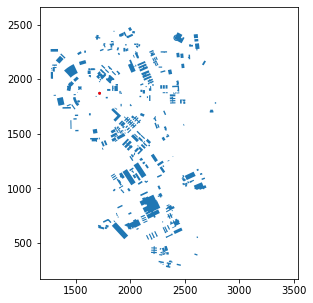

In [28]:
### ----- PLOT DE PREDIO DE ACORDO COM A BUSCA REALIZADA

ax = mapa_normalizado.plot(figsize=(12, 5))

# predios None
predio['geometry'].plot(ax=ax, color='Red')

# Para ampliar area mudar param. de set_xlim e set_ylim
minx, miny, maxx, maxy = mapa_normalizado.total_bounds
ax.set_xlim(minx -100, maxx)
ax.set_ylim(miny -100, maxy)

## Cria e ADD Pontos não encontrados

### IG (parte inferior) e EB

In [66]:
# Tratamento para que prédio do IG e EB não tenham o mesmo centroid do prédio com o ID 554951142

ref_id = 554951142
point_IG = mapa_normalizado.query('osm_id ==' + str(ref_id))
print(point_IG['geometry'].centroid)

# Get Polygon value
# get_polygon_coords(point_IG)

111    POINT (2089.558 1166.068)
dtype: geometry


(1000.0, 1500.0)

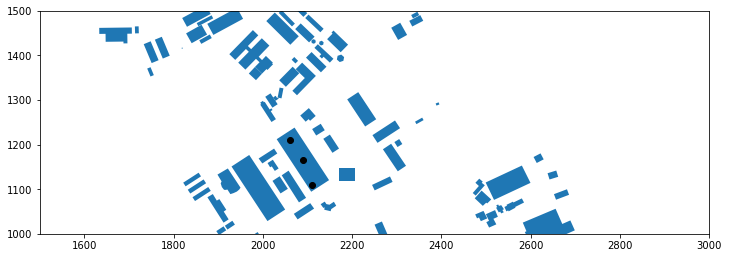

In [67]:
# Reposicionando posicionamento do IG e EB (ao inves de centroid do prédio)
pt_IG = Point(2110, 1110)
pt_EB = Point(2060, 1210)

# Plot de paradas de ÔNIBUS
pt_IG_df = gpd.GeoDataFrame(columns=["geometry"],  crs='EPSG:31983')
pt_IG_df.loc[0, 'geometry'] = pt_IG
pt_IG_df.loc[1, 'geometry'] = Point (2089.558, 1166.068) # point_IG['geometry'].centroid
pt_IG_df.loc[2, 'geometry'] = pt_EB

ax = mapa_normalizado['geometry'].plot(figsize=(12, 5))
pt_IG_df.plot(ax=ax, color="black")

# para ampliar area mudar param. de set_xlim e set_ylim
minx, miny, maxx, maxy = mapa_normalizado.total_bounds
ax.set_xlim(1500, 3000)
ax.set_ylim(1000, 1500)

### Paradas de Ônibus

In [68]:
# Coordenadas obtidas pelo notebook "Mapa dinâmico"
# Google Maps ajuda nessa parte tb

parada_RM = Point(-47.0677, -22.8242) 
parada_AL = Point(-47.0629, -22.8319) 
parada_VB = Point(-47.0628, -22.8275)

# Convertendo Coordenadas em Degree para metros (31983)
pontos_onibus_df = gpd.GeoDataFrame(columns=["geometry"],  crs='EPSG:4326')
pontos_onibus_df.loc[0, 'geometry'] = parada_RM
pontos_onibus_df.loc[1, 'geometry'] = parada_AL
pontos_onibus_df.loc[2, 'geometry'] = parada_VB
pontos_onibus_df = pontos_onibus_df.to_crs('EPSG:31983')
# pontos_onibus_df.crs
pontos_onibus_df

,geometry
0,POINT (287793.104 7474455.271)
1,POINT (288297.792 7473609.406)
2,POINT (288301.248 7474096.840)


In [69]:
# PONTOS no CRS EPSG:31983
parada_RM = Point(pontos_onibus_df['geometry'][0])
parada_AL = Point(pontos_onibus_df['geometry'][1])
parada_VB = Point(pontos_onibus_df['geometry'][2])

print(parada_RM)
print(parada_AL)
print(parada_VB)

POINT (287793.1041268592 7474455.270733602)
POINT (288297.7924639747 7473609.405694909)
POINT (288301.2480990409 7474096.839670669)


In [70]:
# NORMALIZAÇÃO DE PONTOS 

points = [parada_RM, parada_AL, parada_VB]
norm_points = []

# convert to 2D array 
x = np.array(all_coords_x).reshape(-1, 1) # reshape -> 2D array
y = np.array(all_coords_y).reshape(-1, 1)

for coords in points:
    # convert to 2D array
    x_coords = np.array([coords.x]).reshape(-1, 1)
    y_coords = np.array([coords.y]).reshape(-1, 1)

    # define limits of normalization
    scaler_x = MinMaxScaler(feature_range = (0, unicamp_maxx - unicamp_minx))
    scaler_y = MinMaxScaler(feature_range = (0, unicamp_maxy - unicamp_miny))

    # normalize with all all geometry coords x 
    scaler_x.fit(x)
    transform_x = scaler_x.transform(x_coords)

    # normalize with all all geometry coords y
    scaler_y.fit(y)
    transform_y = scaler_y.transform(y_coords)

    print(transform_x, transform_y)
    norm_points.append(Point(transform_x, transform_y))

print(norm_points[0])

[[1832.38494007]] [[1067.99849656]]
[[2337.07327719]] [[222.13345787]]
[[2340.52891225]] [[709.56743363]]
POINT (1832.384940070857 1067.998496558517)


In [71]:
# p/ Plotar paradas de ÔNIBUS
pontos_onibus_norm_df = gpd.GeoDataFrame(columns=["geometry"],  crs='EPSG:31983')
pontos_onibus_norm_df.loc[0, 'geometry'] = norm_points[0]
pontos_onibus_norm_df.loc[1, 'geometry'] = norm_points[1]
pontos_onibus_norm_df.loc[2, 'geometry'] = norm_points[2]

pontos_onibus_norm_df

,geometry
0,POINT (1832.385 1067.998)
1,POINT (2337.073 222.133)
2,POINT (2340.529 709.567)


<AxesSubplot:>

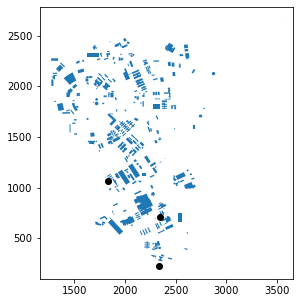

In [72]:
# Plot de paradas de ÔNIBUS
ax = mapa_normalizado['geometry'].plot(figsize=(12, 5))
pontos_onibus_norm_df.plot(ax=ax, color="black")

In [73]:
a =  mapa_normalizado.iloc[mapa_normalizado.shape[0]-10: mapa_normalizado.shape[0]]
a

,geometry,osm_id,name,type
292,"POLYGON ((2475.582 1043.396, 2479.730 1034.537...",698317158.0,Editora Unicamp,university
293,"POLYGON ((2500.518 1026.088, 2506.724 1013.990...",698317159.0,Nudecri / Labeurb,university
294,"POLYGON ((2522.389 1058.417, 2528.388 1047.944...",698317160.0,None,university
295,"POLYGON ((2889.450 2125.000, 2889.371 2123.388...",10000000.0,Museu Exploratório,university
296,"POLYGON ((1748.000 2289.589, 1748.000 2323.997...",10000001.0,IG-cima,university
297,"POLYGON ((2344.682 1776.383, 2344.682 1829.005...",10000002.0,CCUEC,university
298,"POLYGON ((2686.934 1574.140, 2686.934 1622.378...",10000003.0,CBMEG,university
299,"POLYGON ((1737.834 1830.674, 1737.748 1828.924...",10000004.0,CBI,university
300,"POLYGON ((2558.121 659.998, 2558.121 753.018, ...",10000005.0,Sergio Porto,school
301,"POLYGON ((2205.520 1117.263, 2205.520 1148.459...",10000006.0,GGO,university


# Criação de dataset dos Prédios da Unicamp

- Create a xml file with Unicamp Building shapes & height
- The outuput xml file will serve as input of NS3

In [48]:
# estudando e tratando a string Polygon
polygon_str = str(mapa_normalizado['geometry'][0])
polygon_coords = polygon_str[polygon_str.find("(") + 2:]
polygon_coords = polygon_coords[ : polygon_coords.find(")")]
polygon_coords

'653.7600999996066 1952.626000000164, 653.9206999996677 1944.120199999772, 637.80979999993 1943.906200000085, 637.80979999993 1952.358500000089, 653.7600999996066 1952.626000000164, 653.7600999996066 1952.626000000164'

In [49]:
# Criando xml dataset
from xml.dom import minidom
import os 
  
root = minidom.Document()
  
xml = root.createElement('additional') 
xml.setAttribute('xmlns:xsi','http://www.w3.org/2001/XMLSchema-instance')
xml.setAttribute('xsi:noNamespaceSchemaLocation','http://sumo.dlr.de/xsd/additional_file.xsd')
root.appendChild(xml)

for i in range(len(mapa_normalizado['geometry'])):   
    
    polygon_str = str(mapa_normalizado['geometry'][i])
    polygon_coords = polygon_str[polygon_str.find("(") + 2:]
    polygon_coords = polygon_coords[ : polygon_coords.find(")")]
    
    productChild = root.createElement('poly')
    productChild.setAttribute('id', str(mapa_normalizado['id'][i]))
    productChild.setAttribute('type', 'university')
    productChild.setAttribute('color', '255.0,230.0,230.0')
    productChild.setAttribute('layer', '-1.0')
    productChild.setAttribute('fill', '1')
    productChild.setAttribute('height', '6.1')
    productChild.setAttribute('shape', polygon_coords)
  
    xml.appendChild(productChild)
  
xml_str = root.toprettyxml(indent ="\t") 
  
save_path_file = "predios_unicamp_dataset.xml"
  
with open(save_path_file, "w") as f:
    f.write(xml_str) 


In [50]:
print("SHAPE:", mapa_normalizado.shape)

SHAPE: (1170, 4)


# Criação de dataset do posicionamento dos Coletores

- Buscar e Mapear predios que contem coletores
    - https://www.prefeitura.unicamp.br/2016/02/26/programa-de-coleta-de-pilhas-e-baterias-instalacao-de-coletores/
    - https://unicamp-arcgis.maps.arcgis.com/apps/View/index.html?appid=1d96ada62af4451bb4972b9779d09e66

- Rotular prédios sem nome
    - Anotar centroids de prédios mapeados
- Criar dataset de posicionamento de nós

## Rotular prédios sem nome

In [77]:
# Dataset de Prédios com coletores
building_label = {
    "163762428":"INOVA",
    "95463723": "BC",
    "10000003": "CBMEG",
    "554951142": "CCS",
    "10000002": "CCUEC",
    "556327645": "GASTROCENTRO",
    "562047735": "CEPETRO",
    "556327636": "HEMOCENTRO",
    "556327686": "CEMEQ",
    "10000004": "CBI",
    "95011161": "CBII",
    "95463720": "CDC",
    "554951141": "DGA",
    "362643631": "DGRH",
    "537155702": "DEdIC",
    "10000005": "Sergio porto",
    "537142892": "FCM",
    "96446654": "FEF",
    "537142893": "FEnf",
    "97592693": "FEAGRI",
    "556327678": "FEC",
    "554951120": "FEA",
    "269851018": "FEEC",
    "554951124": "FEM",
    "554968138": "FEQ",
    "556327623": "FUNCAMP",
    "562047779": "GR",
    "10000006": "GGO", 
    "538334949": "HC",
    "537166697": "IA",
    "95540601": "IB",
    "95011169": "IC",
    "556327698": "IEL",
    "95463722": "IFCH", 
    "556327703": "IFGW",
    "10000001": "IG-CIMA", 
    "95463724": "IMECC",
    "96493946": "IQ",
    "562047775": "PREFEITURA",
    "269851019": "RA",
    "270488633": "RS",
    "95463718": "RU",        
} 

nodes_df = gpd.GeoDataFrame(columns=['osm_id', 'name', 'type', 'geometry', 'centroid'])

# Labeling buildings
aux = 0
for key, value in building_label.items():
    building = mapa_normalizado.query('osm_id ==' + str(key))
    building_n = building.copy()
    building_n.loc[building.index, 'name'] = value
    nodes_df.loc[aux, ['osm_id']] = building_n['osm_id'].values   
    nodes_df.loc[aux, ['name']] = building_n['name'].values    
    nodes_df.loc[aux, ['type']] = building_n['type'].values
    nodes_df.loc[aux, ['geometry']] = building_n['geometry'].values
#     nodes_df.loc[aux, ['centroids']] = building_n['centroids'].values
    
    aux = aux + 1
    
nodes_df.head()
# nodes_df.shape


,osm_id,name,type,geometry,centroid
0,163762428.0,INOVA,None,"POLYGON ((2537.468 2317.065, 2557.548 2318.984...",NaN
1,95463723.0,BC,library,"POLYGON ((1418.961 1897.896, 1451.293 1890.141...",NaN
2,10000003.0,CBMEG,university,"POLYGON ((2686.934 1574.140, 2686.934 1622.378...",NaN
3,554951142.0,CCS,None,"POLYGON ((2030.907 1211.909, 2070.898 1237.890...",NaN
4,10000002.0,CCUEC,university,"POLYGON ((2344.682 1776.383, 2344.682 1829.005...",NaN


In [78]:
nodes_df['centroid'] = nodes_df.centroid
nodes_df.head()

,osm_id,name,type,geometry,centroid
0,163762428.0,INOVA,None,"POLYGON ((2537.468 2317.065, 2557.548 2318.984...",POINT (2555.945 2307.239)
1,95463723.0,BC,library,"POLYGON ((1418.961 1897.896, 1451.293 1890.141...",POINT (1448.467 1935.840)
2,10000003.0,CBMEG,university,"POLYGON ((2686.934 1574.140, 2686.934 1622.378...",POINT (2677.671 1598.259)
3,554951142.0,CCS,None,"POLYGON ((2030.907 1211.909, 2070.898 1237.890...",POINT (2089.558 1166.068)
4,10000002.0,CCUEC,university,"POLYGON ((2344.682 1776.383, 2344.682 1829.005...",POINT (2308.582 1802.694)


<AxesSubplot:>

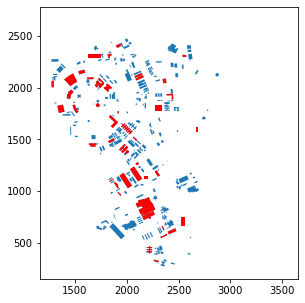

In [79]:
ax = mapa_normalizado['geometry'].plot(figsize=(12, 5))

# predios com coletores
nodes_df['geometry'].plot(ax=ax, color="red")

## Criar dataset de posicionamento de nós

In [66]:
# GENERATE BUILDINGS CSV FILE

#---- create a csv file
def create_csv(title, colunms_names):
    with open(title,"w+") as file:
        writer = csv.writer(file, delimiter=",")
        writer.writerow(colunms_names)


#---- add row on csv file
def add_csv_rows(ns3_settings, colunms_names, title):
    for colunm in ns3_settings:
        if len(colunm) == len(colunms_names):
            with open(title,"a") as file:
                writer = csv.writer(file, delimiter=",")
                writer.writerow([x for x in colunm])


In [81]:
colunms_names  = ['osm_id', 'name', 'type', 'x', 'y', 'z']

nodes_pos = []
for i in range(len(nodes_df.geometry)):
    # tratando a string Point
    point_str = str(nodes_df['centroid'][i])
    point_coords = point_str[point_str.find("(") + 1:]
    point_coords = point_coords[ : point_coords.find(")")]
    x = point_coords.split()[0]
    y = point_coords.split()[1]
    z = 1.5

    items_per_row = [nodes_df.loc[i]['osm_id'],
              nodes_df.loc[i]['name'],
              nodes_df.loc[i]['type'],
              x, y, z]
    
    nodes_pos.append(items_per_row)

output_filename = 'coletores_pos_dataset.csv'
create_csv(output_filename, colunms_names)
add_csv_rows(nodes_pos, colunms_names, output_filename)

In [82]:
node_pos_df = pd.read_csv("coletores_pos_dataset.csv") 

print("DATASET SHAPE:", node_pos_df.shape)
node_pos_df.head()

DATASET SHAPE: (42, 6)


,osm_id,name,type,x,y,z
0,163762428.0,INOVA,NaN,2555.945455,2307.239101,1.5
1,95463723.0,BC,library,1448.467151,1935.840334,1.5
2,10000003.0,CBMEG,university,2677.671396,1598.259044,1.5
3,554951142.0,CCS,NaN,2089.558260,1166.067834,1.5
4,10000002.0,CCUEC,university,2308.582297,1802.694367,1.5


## ADD pontos não encontrados

In [83]:
# ADD pontos
add_node_dataset_rows(node_pos_df, "IG-baixo", "university", pt_IG)
add_node_dataset_rows(node_pos_df, "EB", "university", pt_EB)
add_node_dataset_rows(node_pos_df, "PO-RM", "stop_bus", norm_points[0]) # parada_RM
add_node_dataset_rows(node_pos_df, "PO-AL", "stop_bus", norm_points[1]) # parada_AL
add_node_dataset_rows(node_pos_df, "PO-VB", "stop_bus", norm_points[2]) # parada_VB

Novo Shape: (43, 6)
Novo Shape: (44, 6)
Novo Shape: (45, 6)
Novo Shape: (46, 6)
Novo Shape: (47, 6)


,osm_id,name,type,x,y,z
46,10000011.0,PO-VB,stop_bus,2340.528912,709.567434,1.5


In [84]:
view = node_pos_df.iloc[node_pos_df.shape[0]-10:node_pos_df.shape[0]]
view

,osm_id,name,type,x,y,z
37,96493946.0,IQ,NaN,1872.411480,1672.640200,1.5
38,562047775.0,PREFEITURA,NaN,1929.015446,974.247673,1.5
39,269851019.0,RA,restaurant,2100.988849,1265.442596,1.5
40,270488633.0,RS,restaurant,2364.718497,2065.622354,1.5
41,95463718.0,RU,restaurant,1363.622221,1796.177263,1.5
42,10000007.0,IG-baixo,university,2110.000000,1110.000000,1.5
43,10000008.0,EB,university,2060.000000,1210.000000,1.5
44,10000009.0,PO-RM,stop_bus,1832.384940,1067.998497,1.5
45,10000010.0,PO-AL,stop_bus,2337.073277,222.133458,1.5
46,10000011.0,PO-VB,stop_bus,2340.528912,709.567434,1.5


<AxesSubplot:>

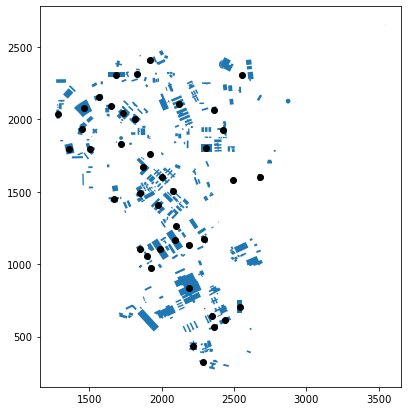

In [85]:
ax = mapa_normalizado['geometry'].plot(figsize=(15, 7))

# centroids
nodes_df["centroid"].plot(ax=ax, color="black")


# Salvando Mapa de prédios da Unicamp Normalizado (shapefile)

In [51]:
# verificando se não foi atribuindo um CRS anteriormente
mapa_normalizado.crs is None

True

In [52]:
# atribuindo um CRS
mapa_normalizado = mapa_normalizado.set_crs('epsg:31983')
mapa_normalizado.crs  

<Projected CRS: EPSG:31983>
Name: SIRGAS 2000 / UTM zone 23S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Brazil - 48°W to 42°W
- bounds: (-48.0, -33.5, -42.0, 5.13)
Coordinate Operation:
- name: UTM zone 23S
- method: Transverse Mercator
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [53]:
# SALVANDO MAPA NORMALIZADO DE PRÉDIOS no formato Shapefile
mapa_normalizado.to_file('mapa_predios_unicamp_normalizado.shp')

# Testando abrir arquivo salvo
unicamp_gdf = gpd.read_file('mapa_predios_unicamp_normalizado.shp')

<ipython-input-53-0d4d6b629c88>:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  mapa_normalizado.to_file('mapa_predios_unicamp_normalizado.shp')


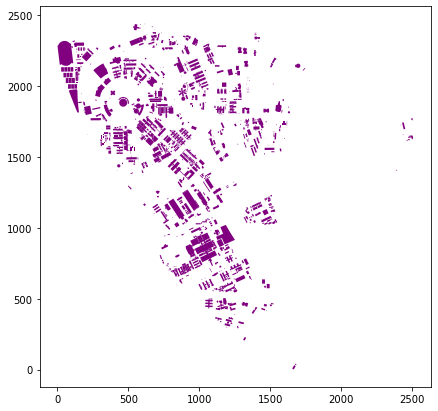

In [54]:
ax = unicamp_gdf['geometry'].plot(figsize=(15, 7), color='purple')

# Dataset de Nós - Experimentos Reais

In [55]:
#---- EXTRACT LAT, LNG and RSSI VALUES FROM txt dataset

# The dataset used here is available on: https://github.com/helderbetiol/LoRaWAN-IC2019
def get_txt_values(filename):
    
    # list of all rows of buildings_settings
    file_rows = []

    # open file in a read mode
    file = open(filename, 'r')

    for line in file.readlines():
        
        # create a str without \n and ","
        line_str = line.strip().split("\t")  
        file_rows.append(line_str)
    
    # remove colunm names
    file_rows.pop(0)
    
    return file_rows

In [56]:
# Apontando para o path do dataset da Unicamp
current_path = os.getcwd()
map_dataset_path = current_path[:current_path.find('obstacle_exp')]

# print(current_path)
# print(map_dataset_path)
dataset_path = "datasets/exp-reais-dataset/table-rssi-2805"
txt_rows = get_txt_values(map_dataset_path + dataset_path)
# txt_rows

In [59]:
# Coordenadas obtidas pelo notebook "Mapa dinâmico"
points_list = []

for row in txt_rows:
    lat = float(row[1])
    lng = float(row[0])
    points_list.append(Point(lat, lng))

In [60]:
# Convertendo Coordenadas em Degree para metros (31983)
pontos_rssi_df = gpd.GeoDataFrame(columns=["geometry"],  crs='EPSG:4326')
for index in range(len(points_list)):
    pontos_rssi_df.loc[index, 'geometry'] = points_list[index]
    

# PONTOS no CRS EPSG:31983
pontos_rssi_df = pontos_rssi_df.to_crs('EPSG:31983')
    
    
print("CRS:\t", pontos_rssi_df.crs)
print("SHAPE:", pontos_rssi_df.shape)
pontos_rssi_df.head()

CRS:	 EPSG:31983
SHAPE: (246, 1)


,geometry
0,POINT (288841.227 7475534.181)
1,POINT (288841.227 7475534.181)
2,POINT (288801.286 7475533.847)
3,POINT (288749.059 7475538.325)
4,POINT (288699.161 7475552.473)


In [61]:
# NORMALIZAÇÃO DE PONTOS 

points_list_meters = []
for i in range(len(pontos_rssi_df['geometry'])):
    points_list_meters.append(pontos_rssi_df['geometry'][i])
    
norm_points = []

# convert to 2D array 
x = np.array(all_coords_x).reshape(-1, 1) # reshape -> 2D array
y = np.array(all_coords_y).reshape(-1, 1)

for coords in points_list_meters:
    # convert to 2D array
    x_coords = np.array([coords.x]).reshape(-1, 1)
    y_coords = np.array([coords.y]).reshape(-1, 1)

    # define limits of normalization
    scaler_x = MinMaxScaler(feature_range = (0, unicamp_maxx - unicamp_minx))
    scaler_y = MinMaxScaler(feature_range = (0, unicamp_maxy - unicamp_miny))

    # normalize with all all geometry coords x 
    scaler_x.fit(x)
    transform_x = scaler_x.transform(x_coords)

    # normalize with all all geometry coords y
    scaler_y.fit(y)
    transform_y = scaler_y.transform(y_coords)

#     print(transform_x, transform_y)
    norm_points.append(Point(transform_x, transform_y))

print(norm_points[0])

POINT (1732.214596386068 2177.670549884439)


In [62]:
# p/ Plotar pontos RSSI
pontos_rssi_norm_df = gpd.GeoDataFrame(columns=["geometry", "rssi"],  crs='EPSG:31983')

for index in range(len(norm_points)):
    pontos_rssi_norm_df.loc[index, 'geometry'] = norm_points[index]
    pontos_rssi_norm_df.loc[index, 'rssi'] = txt_rows[index][2]

pontos_rssi_norm_df.head()

,geometry,rssi
0,POINT (1732.215 2177.671),-95
1,POINT (1732.215 2177.671),-96
2,POINT (1692.274 2177.336),-94
3,POINT (1640.046 2181.814),-103
4,POINT (1590.148 2195.962),-103


<AxesSubplot:>

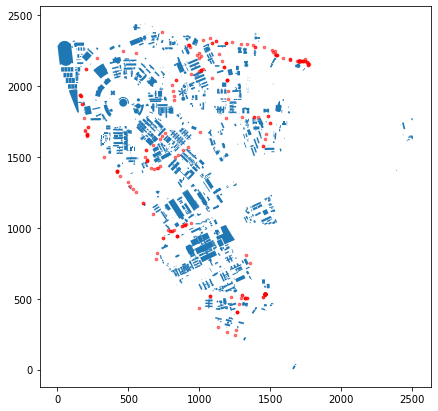

In [70]:
# visualização de pontos normalizados

ax = mapa_normalizado['geometry'].plot(figsize=(15, 7))

# pontos_rssi_norm_df.plot(ax =ax, color= 'red', alpha=0.5, linewidth=0.5, edgecolor='k')
pontos_rssi_norm_df.plot(ax =ax, color= 'red', alpha=0.5, linewidth=1, markersize =7)

In [71]:
pontos_rssi_norm_df.head()

,geometry,rssi
0,POINT (1732.215 2177.671),-95
1,POINT (1732.215 2177.671),-96
2,POINT (1692.274 2177.336),-94
3,POINT (1640.046 2181.814),-103
4,POINT (1590.148 2195.962),-103


In [72]:
# Criar csv

colunms_names  = ['rssi', 'x', 'y', 'z']

nodes_pos = []
for i in range(len(pontos_rssi_norm_df.geometry)):
    # tratando a string Point
    point_str = str(pontos_rssi_norm_df['geometry'][i])
    point_coords = point_str[point_str.find("(") + 1:]
    point_coords = point_coords[ : point_coords.find(")")]
    x = point_coords.split()[0]
    y = point_coords.split()[1]
    z = 1.5

    items_per_row = [
        pontos_rssi_norm_df.loc[i]['rssi'],
        x,
        y,
        z
    ]
    
    nodes_pos.append(items_per_row)

output_filename = 'rssi_dataset.csv'
create_csv(output_filename, colunms_names)
add_csv_rows(nodes_pos, colunms_names, output_filename)

In [73]:
# visualizando dataset criado
rssi_node_pos_df = pd.read_csv('rssi_dataset.csv') 

print("DATASET SHAPE:", rssi_node_pos_df.shape)
rssi_node_pos_df.head()

DATASET SHAPE: (246, 4)


,rssi,x,y,z
0,-95,1732.214596,2177.670550,1.5
1,-96,1732.214596,2177.670550,1.5
2,-94,1692.273828,2177.335692,1.5
3,-103,1640.046160,2181.814115,1.5
4,-103,1590.148171,2195.961734,1.5
